In [14]:
library(tidyverse)
library(ggplot2)
library(dplyr)
# Load data
data <- read_csv("../data/final-data3.csv")
names(data)

Rows: 439149 Columns: 110
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): contractid, state, county, org_type, plan_type, partd, snp, eghp, ...
dbl (94): planid, fips, n_nonmiss, avg_enrollment, sd_enrollment, min_enroll...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "contractid"          "planid"              "fips"               
  [4] "n_nonmiss"           "avg_enrollment"      "sd_enrollment"      
  [7] "min_enrollment"      "max_enrollment"      "first_enrollment"   
 [10] "last_enrollment"     "state"               "county"             
 [13] "org_type"            "plan_type"           "partd"              
 [16] "snp"                 "eghp"                "org_name"           
 [19] "org_marketing_name"  "plan_name"           "parent_org"         
 [22] "contract_date"       "state_long"          "county_long"        
 [25] "n_elig"              "n_enrol"             "avg_eligibles"      
 [28] "sd_eligibles"        "min_eligibles"       "max_eligibles"      
 [31] "first_eligibles"     "last_eligibles"      "avg_enrolled"       
 [34] "sd_enrolled"         "min_enrolled"        "max_enrolled"       
 [37] "first_enrolled"      "last_enrolled"       "ssa"                
 [40] "ncount"              "breastcancer_screen" "rectalcancer_screen"
 [43] "cv_diab_cholscreen"  "glaucoma_test"       "monitoring"         
 [46] "flu_vaccine"         "pn_vaccine"          "physical_health"    
 [49] "mental_health"       "osteo_test"          "physical_monitor"   
 [52] "primaryaccess"       "osteo_manage"        "diab_healthy"       
 [55] "bloodpressure"       "ra_manage"           "copd_test"          
 [58] "bladder"             "falling"             "nodelays"           
 [61] "doctor_communicate"  "carequickly"         "customer_service"   
 [64] "overallrating_care"  "overallrating_plan"  "complaints_plan"    
 [67] "appeals_timely"      "appeals_review"      "leave_plan"         
 [70] "audit_problems"      "hold_times"          "info_accuracy"      
 [73] "ttyt_available"      "new_contract"        "partc_score"        
 [76] "partcd_score"        "Star_Rating"         "aged_parta"         
 [79] "aged_partb"          "risk_ab"             "risk_star5"         
 [82] "risk_star45"         "risk_star4"          "risk_star35"        
 [85] "risk_star3"          "risk_star25"         "risk_bonus5"        
 [88] "risk_bonus35"        "risk_bonus0"         "year"               
 [91] "ma_rate"             "cv_cholscreen"       "diab_cholscreen"    
 [94] "diabetes_eye"        "diabetes_kidney"     "diabetes_bloodsugar"
 [97] "diabetes_chol"       "corrective_action"   "low_score"          
[100] "org_parent"          "bmi_assess"          "older_medication"   
[103] "older_function"      "older_pain"          "readmissions"       
[106] "access_problems"     "coordination"        "improve"            
[109] "enroll_timely"       "specialneeds_manage"

# Question 1: Table of Summary statistics 
Provide a table of summary statistics showing the mean star rating, mean number of enrollments, and mean market share for plans by year. The variables (star rating, enrollments, market share) should be listed as columns and years (2010-2015) as rows. Provide an additional column reflecting the total number of plans underlying your summary statistics in each year.

In [26]:
table <- data %>%
    mutate(market_share = (n_enrol / n_elig) *100) %>%
    group_by(year) %>%
    summarize(
        mean_star_rating = mean(Star_Rating, na.rm = TRUE),
        mean_enrollment = mean(n_enrol, na.rm = TRUE),
        mean_market_share = mean(market_share, na.rm = TRUE),
        total_plans = n()
    )%>%

mutate(across(starts_with("mean"), \(x) round(x, 2)))

table

year,mean_star_rating,mean_enrollment,mean_market_share,total_plans
<dbl>,<dbl>,<dbl>,<dbl>,<int>
2010,2.97,10.94,99.42,108222
2011,3.26,11.92,99.30,68003
2012,3.36,11.92,99.37,67246
2013,3.55,11.94,99.47,67835
2014,3.81,11.97,99.71,62344
2015,3.96,11.97,99.72,65499


# Question 2: Table of Summary statistics for plans without a star rating

In [31]:
no_star_plans <- data %>%
    filter(is.na(Star_Rating))
table_no_stars <- no_star_plans %>%
    mutate(market_share = (n_enrol / n_elig) * 100) %>%
    group_by(year) %>%
    summarize(
        mean_enrollment = mean(n_enrol, na.rm = TRUE),
        mean_market_share = mean(market_share, na.rm = TRUE),
        total_plans = n()
    ) %>%
mutate(across(starts_with("mean"), \(x) round(x, 2)))

table_no_stars

year,mean_enrollment,mean_market_share,total_plans
<dbl>,<dbl>,<dbl>,<int>
2010,10.93,99.39,48643
2011,11.95,99.57,12754
2012,11.99,99.94,9077
2013,12.00,100.00,3661
2014,11.99,99.89,3708
2015,12.00,99.98,4680


# Question 3: Bar graphs showing the distribution of star ratings in 2010, 2012, and 2015

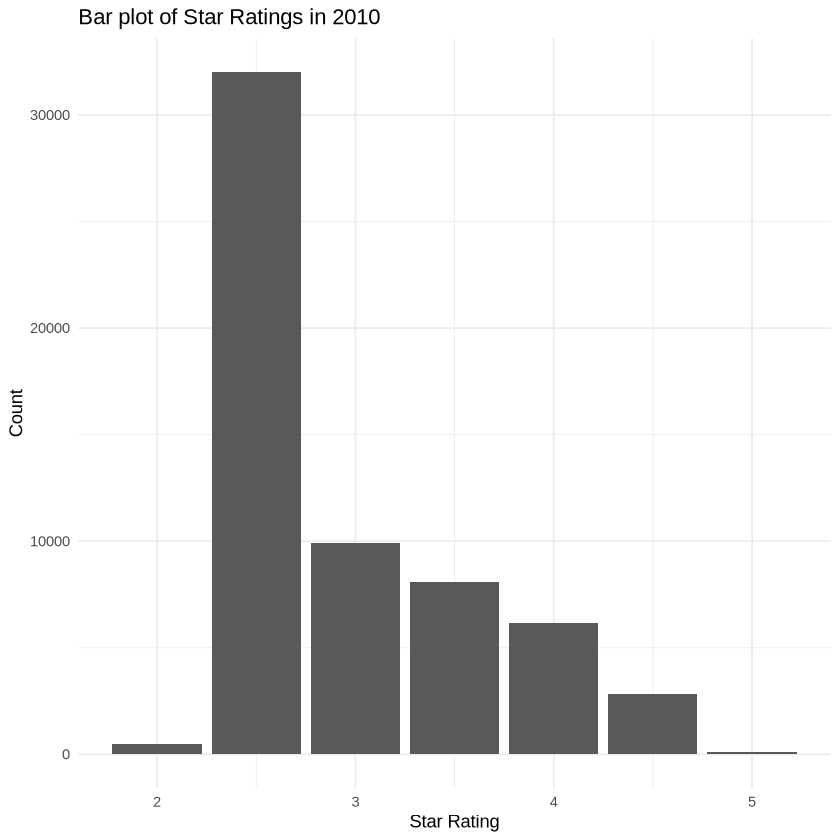

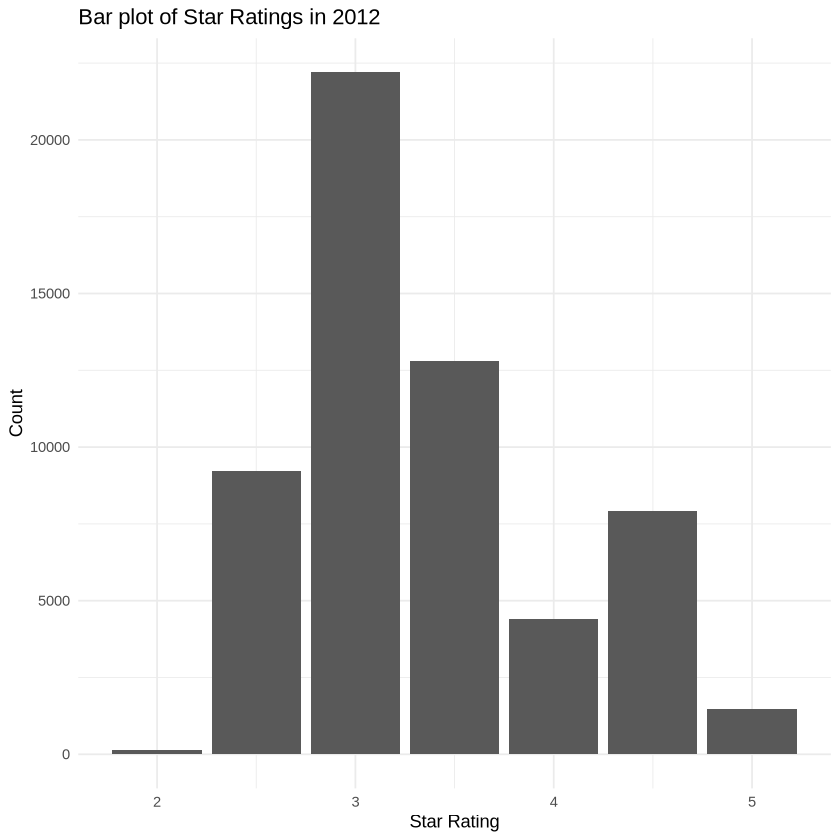

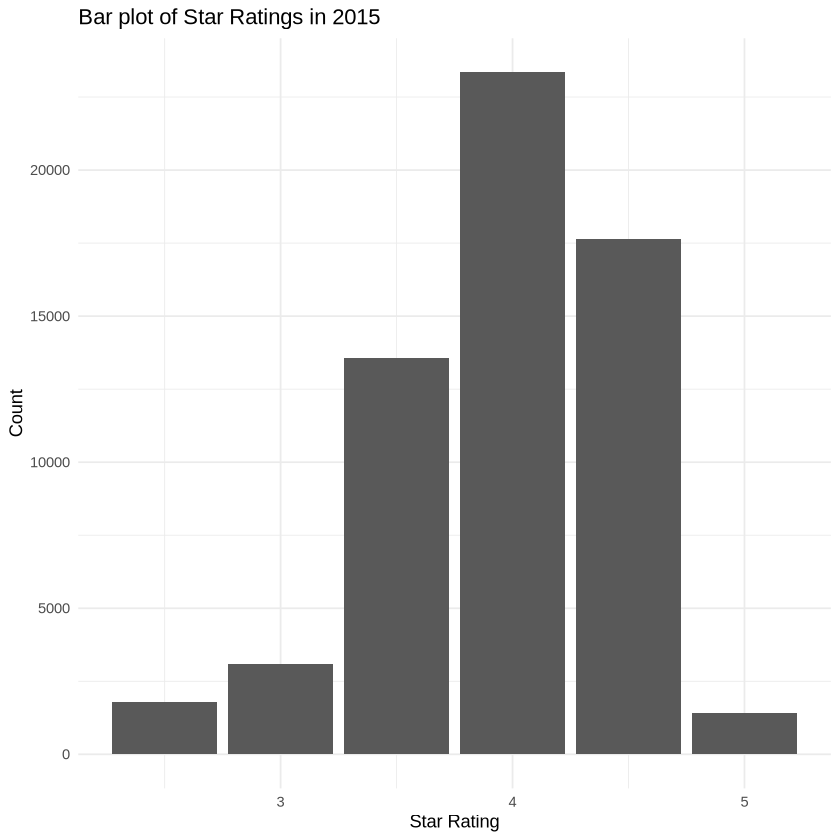

In [37]:
# Bar graph for 2010
star_ratings <- data %>%
    filter(!is.na(Star_Rating))

ggplot(filter(star_ratings, year == 2010), aes(x = Star_Rating)) +
    geom_bar() +
    labs(
        title = "Bar plot of Star Ratings in 2010",
        x = "Star Rating",
        y = "Count") +
    theme_minimal()

# Bar graph for 2012
ggplot(filter(star_ratings, year == 2012), aes(x = Star_Rating)) +
    geom_bar() +
    labs(
        title = "Bar plot of Star Ratings in 2012",
        x = "Star Rating",
        y = "Count") +
    theme_minimal()

# Bar graph for 2015
ggplot(filter(star_ratings, year == 2015), aes(x = Star_Rating)) +
    geom_bar() +
    labs(
        title = "Bar plot of Star Ratings in 2015",
        x = "Star Rating",
        y = "Count") +
    theme_minimal()


 Over time there are s,ignificantly fewer plans, there goes from almost 49,000 plans in 2010 to less than 5,000 plans by 2015. Not only does the number of plans dereas, but the quality of plans increases. In 2010 a majority of plans had a star rating of 2.5, in 2012 most were 3 star, and by 2015 the largest category was 4 stars. 

# Question 4: Table showing regression results from OLS of market share on star ratings for 2010-2015

In [ ]:
# Load 2010 data only

# Question 5: Calculate the running variable underlying the star rating with a table showing the number of rounded plans 3-5 star

# Question 6: Using the RD estimator with a bandwith of 0.125 show estimate of the effect of 3 star versus 2.5 star on enrollments

### estimate the effect at 3.5 stars

# Question 7: Repeat question 6 with alternative bandwidths

# Question 8: Graph of if contracts manipulate the running variable -- Distribution of the running variable before and after the releant threshold values

# Question 9: Examine if plans just above the threshold values have different characteristics than contracts just below the threshold values using HMO and Part D status

# Question 10: Summary of findings for 5-9